In [3]:
#loading
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


In [4]:
data = pd.read_csv('city_day.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [6]:
# df_cleaned = data.dropna(subset=["AQI","AQI_Bucket"])
# df_cleaned.info()

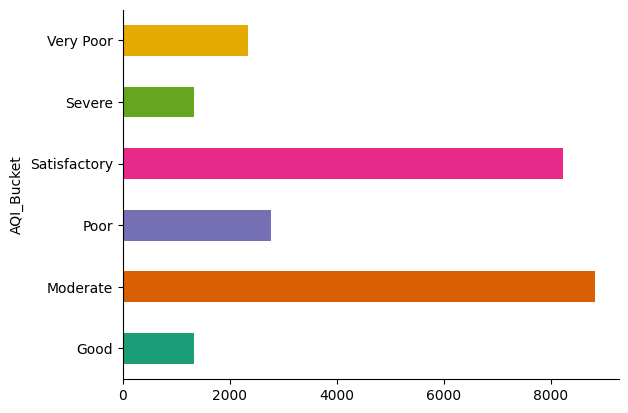

In [7]:

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('AQI_Bucket').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [9]:
df1 = data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [10]:
df = df1.copy()
df = df[df['Date'] <= ('01-01-2020')]
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24908 entries, 0 to 29348
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          24908 non-null  object        
 1   Date                          24908 non-null  datetime64[ns]
 2   AQI                           24908 non-null  float64       
 3   AQI_Bucket                    24908 non-null  object        
 4   Vehicular Pollution content   24908 non-null  float64       
 5   Industrial Pollution content  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ MB


In [11]:
df = df1.copy()
df = df[df['Date'] > ('01-01-2020')]
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4623 entries, 1827 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          4623 non-null   object        
 1   Date                          4623 non-null   datetime64[ns]
 2   AQI                           4623 non-null   float64       
 3   AQI_Bucket                    4623 non-null   object        
 4   Vehicular Pollution content   4623 non-null   float64       
 5   Industrial Pollution content  4623 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 252.8+ KB


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df1 is your DataFrame
# List of categorical attributes
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("Categorical attributes:", categorical_attributes)

# Initialize LabelEncoder for 'City'
le_city = LabelEncoder()
df1['City'] = le_city.fit_transform(df1['City'].astype(str))

# Initialize LabelEncoder for 'AQI_Bucket'
le_aqi_bucket = LabelEncoder()
df1['AQI_Bucket'] = le_aqi_bucket.fit_transform(df1['AQI_Bucket'].astype(str))

# Print DataFrame info
df1.info()

# Create a dictionary mapping encoded values to original class names for 'AQI_Bucket'
aqi_bucket_mapping = {index: label for index, label in enumerate(le_aqi_bucket.classes_)}

print("AQI_Bucket mapping (encoded value to class name):", aqi_bucket_mapping)


Categorical attributes: ['City', 'AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int64         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-n

In [14]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))
df1.info()

categorical_attributes []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int64         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  int64         
d

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df1 is your DataFrame
# List of categorical attributes
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("Categorical attributes:", categorical_attributes)

# Initialize LabelEncoder for 'City'
le_city = LabelEncoder()
df1['City'] = le_city.fit_transform(df1['City'].astype(str))

# Initialize LabelEncoder for 'AQI_Bucket'
le_aqi_bucket = LabelEncoder()
df1['AQI_Bucket'] = le_aqi_bucket.fit_transform(df1['AQI_Bucket'].astype(str))

# Print DataFrame info
df1.info()

# Create a dictionary mapping encoded values to original class names for 'AQI_Bucket'
aqi_bucket_mapping = {index: label for index, label in enumerate(le_aqi_bucket.classes_)}

print("AQI_Bucket mapping (encoded value to class name):", aqi_bucket_mapping)


Categorical attributes: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int64         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  int64         


In [16]:
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,1
1,0,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,1
2,0,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,1
3,0,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,1
4,0,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,10,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,0
29527,10,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,3
29528,10,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,3
29529,10,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,3


In [17]:
y = df1["AQI_Bucket"]
x = df1[[ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the pipeline with RandomForestClassifier
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=23))
])

# Set up the hyperparameters grid
param_grid = {
    'classifier__n_estimators': [10, 20, 50, 100],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],    # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]       # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model
best_predict = best_model.predict(X_test)

# Evaluation metrics
best_conf_matrix = confusion_matrix(y_test, best_predict)
best_acc = accuracy_score(y_test, best_predict) * 100

print("\nClassification Report:\n", classification_report(y_test, best_predict))
print("Confusion Matrix:\n", best_conf_matrix)
print("\nAccuracy:", best_acc)


KeyboardInterrupt: 

In [ ]:
import joblib
joblib.dump(best_model, 'rf_pl_hp_ml.pkl')

In [19]:
from pyspark.sql import SparkSession
import pandas as pd

# Initialize Spark session
spark = SparkSession.builder.appName("AirQualityPrediction").getOrCreate()

# Convert Pandas DataFrame to PySpark DataFrame
df_spark = spark.createDataFrame(df1)


In [20]:
# Rename columns with dots or special characters
df_spark = df_spark.withColumnRenamed("PM2.5", "PM2_5")


In [21]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Index the target column AQI_Bucket
label_indexer = StringIndexer(inputCol="AQI_Bucket", outputCol="indexedLabel")

# Assemble feature columns (exclude 'City', 'Date', and target column 'AQI_Bucket')
feature_columns = ['PM2_5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="assembledFeatures")

# Standardize features
scaler = StandardScaler(inputCol="assembledFeatures", outputCol="features")

# Define Random Forest Classifier
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="features")

# Build the pipeline
pipeline = Pipeline(stages=[label_indexer, assembler, scaler, rf])

# Set up a parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 50]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

# Define evaluator with accuracy as the metric
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

# Set up CrossValidator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=3)

# Train the model
cv_model = crossval.fit(df_spark)

# Evaluate the best model
best_model = cv_model.bestModel
accuracy = evaluator.evaluate(best_model.transform(df_spark))
print(f"Best Model Accuracy: {accuracy}")

# Print best hyperparameters
print("Best Hyperparameters:")
for param, value in best_model.stages[-1].extractParamMap().items():
    print(f"{param.name}: {value}")



Best Model Accuracy: 0.9351867529037283
Best Hyperparameters:
bootstrap: True
cacheNodeIds: False
checkpointInterval: 10
featureSubsetStrategy: auto
featuresCol: features
impurity: gini
labelCol: indexedLabel
leafCol: 
maxBins: 32
maxDepth: 15
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
minWeightFractionPerNode: 0.0
numTrees: 50
predictionCol: prediction
probabilityCol: probability
rawPredictionCol: rawPrediction
seed: 4733528942272657797
subsamplingRate: 1.0


In [22]:
# Save the best model to a specified directory
model_path = "/content/sp_model"
best_model.save(model_path)


In [23]:
#!zip -r /content/air_quality_model.zip /content/sp_model/


  adding: content/sp_model/ (stored 0%)
  adding: content/sp_model/stages/ (stored 0%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/ (stored 0%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/data/ (stored 0%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/data/._SUCCESS.crc (stored 0%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/data/.part-00000-57a87fdb-39ec-4c00-bb26-b56cd61792ec-c000.snappy.parquet.crc (stored 0%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/data/part-00000-57a87fdb-39ec-4c00-bb26-b56cd61792ec-c000.snappy.parquet (deflated 35%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/data/_SUCCESS (stored 0%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/metadata/ (stored 0%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/metadata/part-00000 (deflated 35%)
  adding: content/sp_model/stages/0_StringIndexer_2d984ebda3b5/metadata/._SUCCESS.crc 

In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.pipeline import PipelineModel
import pandas as pd

# Start Spark session

from pyspark.sql import SparkSession

# Create Spark session with the local file system configuration


spark = SparkSession.builder.appName("AirQualityPrediction").getOrCreate()


# Load the saved model
model_path = "sp_model"
loaded_model = PipelineModel.load(model_path)

# Prepare new data for prediction
# Example new data (replace this with your actual data)
data = {
    'City': [0],
    'Date': ['2020-08-01'],
    'PM2_5': [48.57],
    'PM10': [95.68],
    'NO': [0.92],
    'NO2': [18.22],
    'NOx': [17.15],
    'NH3': [15.85],
    'CO': [0.92],
    'SO2': [27.64],
    'O3': [133.36],
    'Benzene': [0.00],
    'Toluene': [0.02],
    'Xylene': [0.00],
    'AQI': [118.0]
}
new_data_df = pd.DataFrame(data)

# Convert new data to PySpark DataFrame
new_data_spark = spark.createDataFrame(new_data_df)

# Use the loaded model for predictions
predictions = loaded_model.transform(new_data_spark)

# Display prediction results
predictions.select("City", "Date", "features", "prediction").show()

# Stop the Spark session after predictions
#spark.stop()


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [25]:
# Stop Spark session after saving the model
#spark.stop()